In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load data
master_data = pd.read_csv("Complete_Data.csv")
#head of the data
master_data.head(5)

,countyFIPS,County_x,State,COVID_deaths,Hazardous Days,Median AQI,COVID_cases,NUM_STAFFED_BEDS,BED_UTILIZATION,TOT_POP,...,PREVENTDental Visit,PREVENTHealth Insurance,PREVENTMammography,UNHBEHBinge Drinking,UNHBEHCurrent Smoking,UNHBEHObesity,UNHBEHPhysical Inactivity,UNHBEHSleep <7 hours,Latitude,Longitude
0,1001,Autauga County,AL,65,NaN,NaN,5440,55.0,0.623113,55869.0,...,64.0,14.3,77.5,14.1,19.8,35.5,26.4,38.4,32.535020,-86.643011
1,1003,Baldwin County,AL,216,0.0,37.0,17496,362.0,2.254794,223234.0,...,66.3,13.6,74.0,17.3,18.5,29.4,23.5,36.4,30.728117,-87.722754
2,1005,Barbour County,AL,40,NaN,NaN,1882,30.0,0.430640,24686.0,...,46.6,21.8,75.9,12.3,25.5,40.8,36.8,40.9,31.869252,-85.393303
3,1007,Bibb County,AL,51,NaN,NaN,2247,25.0,0.376219,22394.0,...,57.6,17.3,73.3,15.0,23.1,38.4,31.2,40.1,32.998544,-87.126532
4,1009,Blount County,AL,94,NaN,NaN,5517,25.0,0.499069,57826.0,...,57.1,17.0,71.5,15.1,23.0,33.7,30.1,38.8,33.980706,-86.567846


In [3]:
#show all columns in our dataset
master_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 108 columns):
 #   Column                                           Dtype  
---  ------                                           -----  
 0   countyFIPS                                       int64  
 1   County_x                                         object 
 2   State                                            object 
 3   COVID_deaths                                     int64  
 4   Hazardous Days                                   float64
 5   Median AQI                                       float64
 6   COVID_cases                                      int64  
 7   NUM_STAFFED_BEDS                                 float64
 8   BED_UTILIZATION                                  float64
 9   TOT_POP                                          float64
 10  TOT_MALE                                         float64
 11  TOT_FEMALE                                       float64
 12  WA_MALE            

In [4]:
#obtain target variable: case-fatality ratio and case population
#case-fatality ratio is total deaths / confirmed cases by county in the United States
master_data['case_fatality'] = (master_data
                                ['COVID_deaths'] / master_data['COVID_cases']).fillna(0)

In [5]:
master_data['case_fatality'].describe()

count    3142.000000
mean        0.017900
std         0.011150
min         0.000000
25%         0.010695
50%         0.015776
75%         0.023232
max         0.181818
Name: case_fatality, dtype: float64

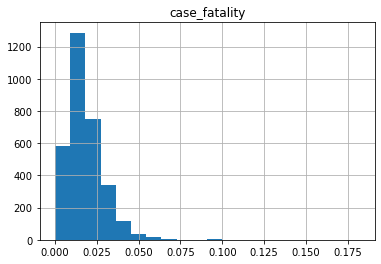

In [6]:
#histogram of target variable: case-fatality ratio
x = master_data.hist(column = ['case_fatality'], bins = 20, figsize = (6, 4))

The case-fatality ratio median is 0.0158 which means 1.5% is the median rate of deaths to confirmed cases by county in the US. From the histogram, we observe around 1300 counties have this number. The maximum case-fatality ratio is Grant county in Nebraska where 18% fatality occured. 76 counties had no deaths.
For more information about Grant county in the news: <br>
http://netnebraska.org/node/1241310 <br>
https://www.usnews.com/news/healthiest-communities/nebraska/grant-county

In [7]:
max_case_fatality = max(master_data['case_fatality'])
min_case_fatality = min(master_data['case_fatality'])
master_data[master_data['case_fatality'] == max_case_fatality]
master_data[master_data['case_fatality'] == min_case_fatality]

,countyFIPS,County_x,State,COVID_deaths,Hazardous Days,Median AQI,COVID_cases,NUM_STAFFED_BEDS,BED_UTILIZATION,TOT_POP,...,PREVENTHealth Insurance,PREVENTMammography,UNHBEHBinge Drinking,UNHBEHCurrent Smoking,UNHBEHObesity,UNHBEHPhysical Inactivity,UNHBEHSleep <7 hours,Latitude,Longitude,case_fatality
67,2013,Aleutians East Borough,AK,0,NaN,NaN,32,NaN,NaN,3337.0,...,20.8,63.5,14.2,21.0,27.8,26.8,38.9,55.359038,-161.979848,0.0
68,2016,Aleutians West Census Area,AK,0,NaN,NaN,128,NaN,NaN,5634.0,...,18.7,66.2,15.6,19.2,29.6,24.4,35.9,52.810787,-107.825461,0.0
71,2060,Bristol Bay Borough,AK,0,NaN,NaN,0,NaN,NaN,836.0,...,13.1,63.6,18.9,21.8,31.5,20.6,34.1,58.742234,-156.701884,0.0
72,2068,Denali Borough,AK,0,NaN,NaN,62,NaN,NaN,2097.0,...,11.9,66.3,17.9,18.6,26.1,19.2,31.7,63.673501,-150.008829,0.0
75,2100,Haines Borough,AK,0,NaN,NaN,16,NaN,NaN,2530.0,...,11.2,64.9,19.8,17.9,27.4,18.0,31.3,59.114485,-135.500793,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,51091,Highland County,VA,0,NaN,NaN,77,NaN,NaN,2190.0,...,15.6,72.6,18.2,21.7,33.5,24.8,37.2,38.362400,-79.568754,0.0
2980,53055,San Juan County,WA,0,NaN,NaN,92,10.0,0.057260,17582.0,...,8.8,64.0,18.3,11.6,25.7,14.3,29.1,48.570970,-122.955332,0.0
2987,53069,Wahkiakum County,WA,0,NaN,NaN,65,NaN,NaN,4488.0,...,11.0,64.7,17.5,16.4,32.3,18.7,33.6,46.292422,-123.424760,0.0
2998,54013,Calhoun County,WV,0,NaN,NaN,204,25.0,0.160877,7109.0,...,13.9,69.6,14.6,29.0,38.3,30.3,44.0,38.843912,-81.117526,0.0


In [8]:
master_data['Median AQI'].describe()

count    985.000000
mean      33.489340
std       11.896921
min        0.000000
25%       31.000000
50%       37.000000
75%       40.000000
max      119.000000
Name: Median AQI, dtype: float64

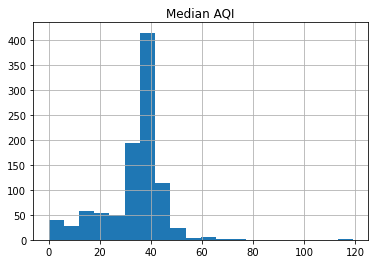

In [9]:
#histogram of target variable: case-fatality ratio
x = master_data.hist(column = ['Median AQI'], bins = 20, figsize = (6, 4))

What demographics are most exposed to our key types of pollution? (race, gender, income level)? <br> Can we answer this question by examining: <br>
What is the top 20 counties with the highest case-fatality ratio? <br>
What is the top 20 cases with top median AQI?

In [10]:
#We examine the county with the highest median AQI
max_median_AQI = master_data['Median AQI'].max()
#min_median_AQI = min(master_data['Median AQI'])
master_data[master_data['Median AQI'] == max_median_AQI]
#master_data[master_data['case_fatality'] == min_case_fatality]

,countyFIPS,County_x,State,COVID_deaths,Hazardous Days,Median AQI,COVID_cases,NUM_STAFFED_BEDS,BED_UTILIZATION,TOT_POP,...,PREVENTHealth Insurance,PREVENTMammography,UNHBEHBinge Drinking,UNHBEHCurrent Smoking,UNHBEHObesity,UNHBEHPhysical Inactivity,UNHBEHSleep <7 hours,Latitude,Longitude,case_fatality
1554,29143,New Madrid County,MO,40,0.0,119.0,1724,NaN,NaN,17076.0,...,20.5,67.5,16.2,28.5,36.6,36.7,37.1,36.594776,-89.651749,0.023202


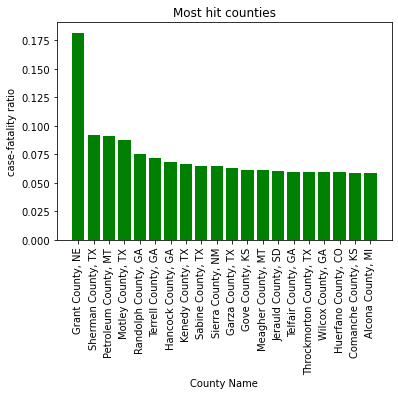

In [11]:
highest_case_fatality_counties = master_data.nlargest(20, 'case_fatality')
cf_list = highest_case_fatality_counties['case_fatality'].tolist()
highest_case_fatality_counties["county"] = highest_case_fatality_counties["County_x"] + ", "+ highest_case_fatality_counties["State"]
county_list = highest_case_fatality_counties['county'].tolist()
fips_list = highest_case_fatality_counties['countyFIPS'].tolist()
variance = [1, 2, 7, 4, 2, 3, 1, 2, 7, 4, 2, 3, 1, 2, 7, 4, 2, 3, 1, 2]
x_pos = [i for i, _ in enumerate(county_list)]
plt.bar(x_pos, cf_list, color='green')
plt.xlabel("County Name")
plt.ylabel("case-fatality ratio")
plt.title("Most hit counties")

plt.xticks(x_pos, county_list)
plt.xticks(rotation = 90)
plt.show()

# The top 20 counties span the states of Massachusettes, New York, Georgia, Texas, Washington, New Mexico, Pennsylvania, Michigan, Missouri, New Jersey and Florida.

# Do we know the portion of the total national case fatality that the case fatality of these counties represent?

# Can we look at the top 20 most populated counties?
# Look at the top 20 most AQI counties?

# Is it valid to have a zero value AQI? We have 11 counties with a zero value.

In [12]:
highest_case_fatality_counties.describe()

,countyFIPS,COVID_deaths,Hazardous Days,Median AQI,COVID_cases,NUM_STAFFED_BEDS,BED_UTILIZATION,TOT_POP,TOT_MALE,TOT_FEMALE,...,PREVENTHealth Insurance,PREVENTMammography,UNHBEHBinge Drinking,UNHBEHCurrent Smoking,UNHBEHObesity,UNHBEHPhysical Inactivity,UNHBEHSleep <7 hours,Latitude,Longitude,case_fatality
count,20.000000,20.000000,0.0,0.0,20.000000,9.000000,9.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,30138.400000,19.750000,NaN,NaN,302.100000,18.333333,0.235921,5428.650000,2880.250000,2548.400000,...,23.310000,69.415000,17.635000,21.430000,35.905000,28.635000,36.96000,36.349799,-96.416189,0.073163
std,15220.778873,14.707231,NaN,NaN,227.993282,5.744563,0.192194,4472.855738,2473.441942,2058.103174,...,10.294858,4.647611,3.071135,3.059257,4.331582,6.197816,4.85781,5.756749,9.345903,0.027744
min,8055.000000,1.000000,NaN,NaN,11.000000,11.000000,0.077299,404.000000,212.000000,192.000000,...,11.100000,57.000000,12.100000,17.600000,27.000000,20.200000,29.80000,26.928548,-110.885930,0.058524
25%,13304.500000,7.000000,NaN,NaN,106.250000,14.000000,0.134075,1650.250000,800.500000,849.750000,...,14.475000,67.350000,15.475000,18.800000,33.150000,23.925000,33.35000,31.961930,-101.778868,0.059787
50%,30064.000000,17.500000,NaN,NaN,287.000000,16.000000,0.147616,4625.500000,2358.500000,1812.500000,...,23.300000,69.200000,18.100000,20.500000,36.100000,26.950000,35.90000,33.671996,-99.241669,0.063702
75%,48192.000000,30.000000,NaN,NaN,432.250000,25.000000,0.236921,8557.000000,4841.250000,3909.750000,...,29.925000,72.900000,19.425000,24.100000,39.025000,33.350000,39.50000,39.665726,-84.674179,0.072703
max,48447.000000,51.000000,NaN,NaN,746.000000,25.000000,0.693808,15860.000000,9307.000000,6553.000000,...,48.100000,75.300000,23.200000,26.600000,42.400000,41.500000,45.90000,47.117063,-82.939197,0.181818


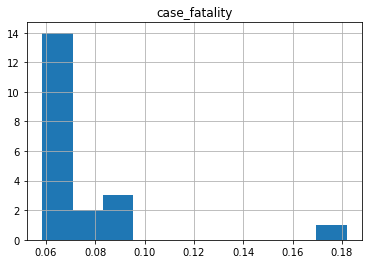

In [13]:
#histogram of target variable: case-fatality ratio
xv = highest_case_fatality_counties.hist(column = ['case_fatality'], bins = 10, figsize = (6, 4))

In [14]:
hcfc1 =pd.melt(highest_case_fatality_counties)
hcfc1.groupby('variable').sum()

,value
variable,
AAC_FEMALE,478
AAC_MALE,529
AA_FEMALE,345
AA_MALE,378
BAC_FEMALE,12129
...,...
WA_FEMALE,37331
WA_MALE,41557
case_fatality,1.46326


In [15]:
jv = highest_case_fatality_counties.corr()
jv.describe()

,countyFIPS,COVID_deaths,Hazardous Days,Median AQI,COVID_cases,NUM_STAFFED_BEDS,BED_UTILIZATION,TOT_POP,TOT_MALE,TOT_FEMALE,...,PREVENTHealth Insurance,PREVENTMammography,UNHBEHBinge Drinking,UNHBEHCurrent Smoking,UNHBEHObesity,UNHBEHPhysical Inactivity,UNHBEHSleep <7 hours,Latitude,Longitude,case_fatality
count,105.000000,105.000000,0.0,0.0,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,...,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,-0.257553,0.446482,NaN,NaN,0.459725,0.022350,-0.065547,0.514847,0.506042,0.510727,...,0.115383,-0.058402,-0.311028,0.321876,0.113956,0.164855,0.305262,-0.213941,0.270004,-0.184343
std,0.244835,0.332063,NaN,NaN,0.330917,0.363297,0.202421,0.344182,0.343216,0.339934,...,0.394484,0.412665,0.406782,0.427236,0.447625,0.452473,0.444097,0.362078,0.411221,0.194812
min,-0.611054,-0.650701,NaN,NaN,-0.604902,-0.499176,-0.651701,-0.528401,-0.511326,-0.533853,...,-0.915826,-0.747132,-0.898727,-0.778831,-0.808529,-0.935315,-0.884750,-0.797696,-0.651701,-0.391491
25%,-0.420331,0.299359,NaN,NaN,0.328162,-0.281698,-0.200460,0.363144,0.357707,0.381344,...,-0.109325,-0.352934,-0.605509,-0.040712,-0.268560,-0.154132,-0.040288,-0.417798,-0.090800,-0.308161
50%,-0.284731,0.511331,NaN,NaN,0.533008,-0.050953,-0.063308,0.577259,0.566722,0.570533,...,0.113408,-0.067016,-0.297316,0.383464,0.042669,0.115013,0.321024,-0.264456,0.319595,-0.215701
75%,-0.141498,0.689455,NaN,NaN,0.671974,0.405774,0.028406,0.757416,0.741097,0.735115,...,0.385083,0.242035,-0.127348,0.720518,0.457906,0.442608,0.666125,-0.113389,0.649808,-0.150160
max,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
jv1 = jv[['COVID_cases', 'case_fatality']].copy()
jv2 = jv1[jv1['case_fatality'] > 0]
jv3 =jv2.sort_values(by=['case_fatality', 'COVID_cases'])
#jv3 = jv2.hist(column = ['case_fatality'], bins = 5, figsize = (6, 4))
jv3

,COVID_cases,case_fatality
PREVENTCore preventive services for older men,-0.108390,0.038877
PREVENTColorectal Cancer Screening,-0.133854,0.052747
PREVENTCervical Cancer Screening,-0.001698,0.064374
UNHBEHObesity,0.328162,0.083375
countyFIPS,-0.494583,0.115456
PREVENTCore preventive services for older women,-0.145615,0.138510
PREVENTDental Visit,-0.403991,0.164873
HLTHOUTCancer (except skin),-0.318450,0.172921
Latitude,-0.362147,0.227885
UNHBEHBinge Drinking,-0.604902,0.338633


In [17]:
master_data.describe()

,countyFIPS,COVID_deaths,Hazardous Days,Median AQI,COVID_cases,NUM_STAFFED_BEDS,BED_UTILIZATION,TOT_POP,TOT_MALE,TOT_FEMALE,...,PREVENTHealth Insurance,PREVENTMammography,UNHBEHBinge Drinking,UNHBEHCurrent Smoking,UNHBEHObesity,UNHBEHPhysical Inactivity,UNHBEHSleep <7 hours,Latitude,Longitude,case_fatality
count,3142.000000,3142.000000,985.000000,985.000000,3.142000e+03,2480.000000,2480.000000,3.142000e+03,3.142000e+03,3.142000e+03,...,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,30383.649268,132.084978,0.026396,33.489340,7.924370e+03,323.057661,1.158547,1.044683e+05,5.145045e+04,5.301789e+04,...,16.542775,70.755092,18.023520,21.322502,35.156715,26.962285,36.812985,38.455741,-92.267707,0.017900
std,15162.508374,507.937280,0.336339,11.896921,2.953987e+04,957.391236,2.529870,3.334567e+05,1.638677e+05,1.696276e+05,...,6.212997,4.030466,3.173782,4.152671,4.525750,5.328977,3.965067,5.307203,12.860045,0.011150
min,1001.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,8.600000e+01,4.100000e+01,4.500000e+01,...,6.300000,54.000000,6.500000,7.100000,15.700000,10.000000,25.600000,19.601235,-164.032748,0.000000
25%,18177.500000,13.000000,0.000000,31.000000,8.350000e+02,25.000000,0.256857,1.090250e+04,5.459750e+03,5.407250e+03,...,12.025000,68.300000,15.700000,18.600000,32.600000,23.200000,33.800000,34.694027,-98.232510,0.010695
50%,29176.000000,33.000000,0.000000,37.000000,1.986000e+03,50.000000,0.452261,2.572600e+04,1.286900e+04,1.282850e+04,...,15.100000,70.800000,17.700000,21.100000,35.500000,26.500000,36.800000,38.378251,-90.400368,0.015776
75%,45080.500000,82.750000,0.000000,40.000000,5.163000e+03,207.000000,1.006451,6.807275e+04,3.415225e+04,3.451250e+04,...,19.100000,73.700000,19.900000,24.000000,38.075000,30.600000,39.700000,41.807509,-83.439455,0.023232
max,56045.000000,15303.000000,8.000000,119.000000,1.055181e+06,22002.000000,57.927889,1.003911e+07,4.949041e+06,5.090066e+06,...,52.400000,81.800000,28.700000,44.600000,50.100000,44.900000,49.100000,69.311788,-67.629186,0.181818


In [18]:
master_data.dtypes

countyFIPS                     int64
County_x                      object
State                         object
COVID_deaths                   int64
Hazardous Days               float64
                              ...   
UNHBEHPhysical Inactivity    float64
UNHBEHSleep <7 hours         float64
Latitude                     float64
Longitude                    float64
case_fatality                float64
Length: 109, dtype: object

In [19]:
nonneg1_pop = master_data[master_data['COVID_deaths'] > 0]['TOT_POP']
neg1_pop = master_data[master_data['COVID_deaths'] == -1]['TOT_POP']
np.mean(nonneg1_pop)

106970.55120678409

In [20]:
np.mean(neg1_pop)

nan

<ipython-input-21-692d72f29771>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg1_pop.dropna(inplace=True)


(array([2.467e+03, 2.630e+02, 1.060e+02, 5.200e+01, 3.900e+01, 2.900e+01,
        1.600e+01, 1.500e+01, 1.800e+01, 1.600e+01, 4.000e+00, 5.000e+00,
        5.000e+00, 3.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

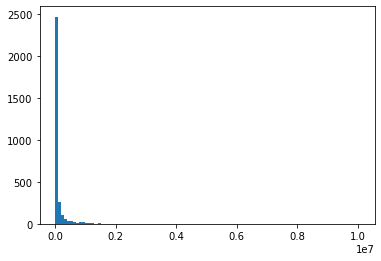

In [21]:
neg1_pop.dropna(inplace=True)
#plt.figure()
plt.hist(nonneg1_pop, bins=100)
#plt.hist(neg1_pop, bins=100)

#plt.hist(neg1_pop)

In [22]:
md2 =master_data[master_data['COVID_deaths'] > 0]
md2['case_fatality'] = (md2['Median AQI']/ md2['COVID_cases'].fillna(0))
#look at .loc method

<ipython-input-22-8acdb1eec598>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md2['case_fatality'] = (md2['Median AQI']/ md2['COVID_cases'].fillna(0))


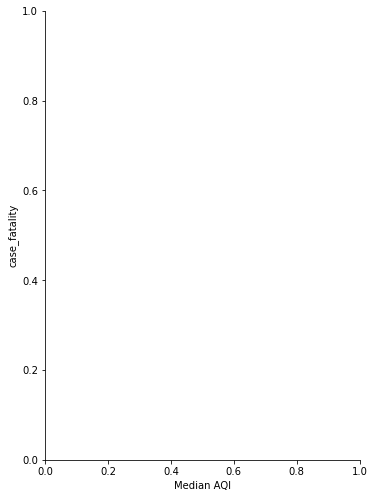

In [23]:
#check linearity of major predictors with target variable
import seaborn as sns
p = sns.pairplot(master_data, x_vars=['Median AQI'], y_vars='case_fatality', height=7, aspect=.75)
#q = sns.pairplot(md2, x_vars=['Median AQI','UNHBEHCurrent Smoking','UNHBEHObesity', 'PREVENTHealth Insurance', 'HLTHOUTCOPD'], 
              #   y_vars='case_fatality', size=7, aspect=0.5)

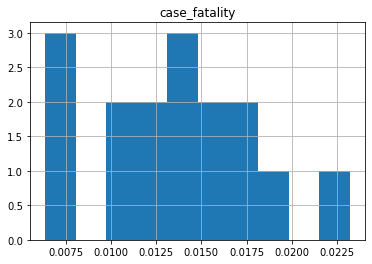

In [24]:
mv1 =master_data[master_data['Median AQI'] > 50]
mv1.describe()
mv1a = mv1.hist(column = ['case_fatality'], bins = 10, figsize = (6, 4))

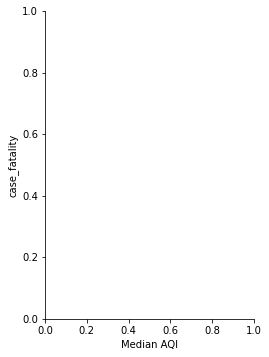

In [25]:
pv = sns.pairplot(mv1, x_vars=['Median AQI'], y_vars='case_fatality', height=5, aspect=.75)

In [26]:
mv2 =master_data[master_data['Median AQI'] == 0]
mv2.describe()
#mv2a = mv2.hist(column = ['case_fatality'], bins = 10, figsize = (6, 4))

,countyFIPS,COVID_deaths,Hazardous Days,Median AQI,COVID_cases,NUM_STAFFED_BEDS,BED_UTILIZATION,TOT_POP,TOT_MALE,TOT_FEMALE,...,PREVENTHealth Insurance,PREVENTMammography,UNHBEHBinge Drinking,UNHBEHCurrent Smoking,UNHBEHObesity,UNHBEHPhysical Inactivity,UNHBEHSleep <7 hours,Latitude,Longitude,case_fatality
count,14.000000,14.000000,14.0,14.0,14.000000,11.000000,11.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,40070.142857,63.928571,0.0,0.0,4060.857143,128.727273,0.725175,49995.714286,24606.785714,25388.928571,...,19.492857,70.135714,17.321429,22.364286,37.328571,27.785714,37.821429,36.336737,-88.882388,0.019530
std,10946.850498,44.777165,0.0,0.0,3018.560759,112.476745,0.531885,38515.666428,18673.072942,19870.238086,...,6.790204,2.962745,2.701333,3.186898,3.099486,3.875338,2.963153,4.331845,7.547248,0.008338
min,17099.000000,21.000000,0.0,0.0,845.000000,25.000000,0.097644,14508.000000,7234.000000,7274.000000,...,11.100000,67.100000,13.100000,18.900000,32.200000,19.000000,30.600000,30.786590,-97.782702,0.008415
25%,37531.000000,30.250000,0.0,0.0,1316.500000,45.500000,0.361063,20993.500000,10748.250000,10245.250000,...,15.075000,68.025000,16.300000,20.175000,34.600000,26.250000,36.950000,33.430396,-95.956908,0.013158
50%,40074.000000,61.000000,0.0,0.0,3229.500000,102.000000,0.544702,34473.000000,17339.500000,17224.000000,...,18.200000,68.750000,17.000000,21.250000,38.750000,28.800000,38.050000,35.554603,-89.203779,0.019313
75%,48288.500000,76.500000,0.0,0.0,6565.250000,145.000000,1.063959,66261.750000,32497.250000,33764.500000,...,24.925000,72.075000,17.650000,25.025000,39.375000,30.500000,38.950000,39.391022,-82.155919,0.023384
max,55085.000000,197.000000,0.0,0.0,9834.000000,349.000000,1.772604,142820.000000,68165.000000,74655.000000,...,33.000000,75.700000,24.400000,28.100000,41.300000,32.100000,43.100000,45.705314,-76.858710,0.036686


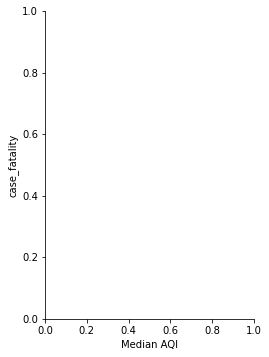

In [27]:
pv2 = sns.pairplot(mv2, x_vars=['Median AQI'], y_vars='case_fatality', height=5, aspect=.75)
pv2

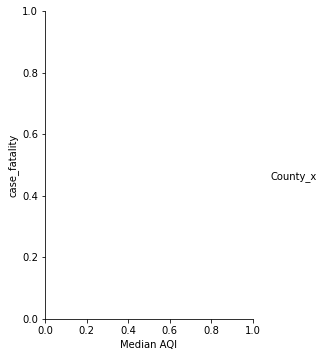

In [28]:
pv3 = sns.pairplot(highest_case_fatality_counties, x_vars=['Median AQI'], y_vars='case_fatality', height=5, aspect=.75, hue="County_x")

In [29]:
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [52]:
master_data_fs = master_data.drop(columns=['State', 'County_x'])

In [54]:
#normalization
nor = preprocessing.MinMaxScaler()
np_scale = nor.fit_transform(master_data_fs)
selected = pd.DataFrame(np_scale, columns=master_data_fs.columns)

In [55]:
#standardization
names = selected.columns
scaler = preprocessing.StandardScaler()
scaled_selected = scaler.fit_transform(selected)
selected = pd.DataFrame(scaled_selected, columns=selected.columns)

In [56]:
y = selected['case_fatality'].values
t = selected.drop(['case_fatality'], axis=1)
X = t.values
colnames = t.columns

In [57]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [59]:
# Construct our Linear Regression model with Recursice Feature Elimination (RFE)
from sklearn.feature_selection import RFE, f_regression
lr = LinearRegression(normalize=True)
lr.fit(X,y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator wit

NameError: name 'MinMaxScaler' is not defined

In [64]:
# Linear Regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
lr = LinearRegression(normalize=True)
lr.fit(X,y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

In [65]:
#Creating the Feature Ranking Matrix

# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")

print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	Lasso	LinReg	Ridge	Mean
countyFIPS	0.04	0.0	0.12	0.05
COVID_deaths	1.0	0.01	0.9	0.64
Hazardous Days	0.0	0.0	0.01	0.0
Median AQI	0.0	0.0	0.04	0.01
COVID_cases	0.76	0.01	1.0	0.59
NUM_STAFFED_BEDS	0.0	0.0	0.02	0.01
BED_UTILIZATION	0.0	0.0	0.1	0.03
TOT_POP	0.0	0.01	0.01	0.01
TOT_MALE	0.0	0.04	0.0	0.01
TOT_FEMALE	0.0	0.02	0.02	0.01
WA_MALE	0.0	0.08	0.0	0.03
WA_FEMALE	0.0	0.08	0.04	0.04
BA_MALE	0.0	0.08	0.03	0.04
BA_FEMALE	0.0	0.15	0.04	0.06
IA_MALE	0.0	0.01	0.07	0.03
IA_FEMALE	0.0	0.01	0.06	0.02
AA_MALE	0.0	0.02	0.0	0.01
AA_FEMALE	0.0	0.03	0.01	0.01
NA_MALE	0.0	0.01	0.0	0.0
NA_FEMALE	0.0	0.01	0.09	0.03
TOM_MALE	0.0	0.01	0.03	0.01
TOM_FEMALE	0.0	0.02	0.03	0.02
WAC_MALE	0.0	0.18	0.01	0.06
WAC_FEMALE	0.0	0.17	0.05	0.07
BAC_MALE	0.0	0.11	0.01	0.04
BAC_FEMALE	0.0	0.19	0.07	0.09
IAC_MALE	0.0	0.02	0.1	0.04
IAC_FEMALE	0.0	0.02	0.04	0.02
AAC_MALE	0.0	0.0	0.01	0.0
AAC_FEMALE	0.0	0.07	0.0	0.02
NAC_MALE	0.0	0.02	0.06	0.03
NAC_FEMALE	0.0	0.02	0.01	0.01
NH_MALE	0.0	0.25	0.02	0.09
NH_FEMALE	0.0	0.25	0.02

In [66]:
#Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

In [67]:
meanplot.rank

<bound method NDFrame.rank of                        Feature  Mean Ranking
1                 COVID_deaths          0.64
4                  COVID_cases          0.59
70                   HWAC_MALE          0.35
71                 HWAC_FEMALE          0.32
46                  NHWAC_MALE          0.21
..                         ...           ...
97     PREVENTHealth Insurance          0.00
52                  NHAAC_MALE          0.00
2               Hazardous Days          0.00
102  UNHBEHPhysical Inactivity          0.00
38                   NHIA_MALE          0.00

[106 rows x 2 columns]>

In [31]:
#define feature and target variables 
X = master_data.drop(columns = ['case_fatality'])
y = master_data['case_fatality']

<AxesSubplot:ylabel='Frequency'>

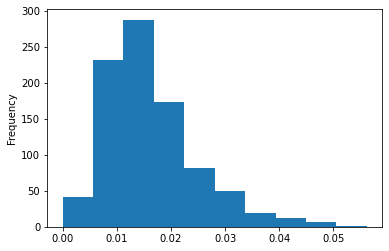

In [32]:
#plot histogram of target varaible
y.plot.hist()

In [33]:
X.dtypes.count()

108

In [34]:
X.isna().sum()

countyFIPS                   0
County_x                     0
State                        0
COVID_deaths                 0
Hazardous Days               0
                            ..
UNHBEHObesity                0
UNHBEHPhysical Inactivity    0
UNHBEHSleep <7 hours         0
Latitude                     0
Longitude                    0
Length: 108, dtype: int64

In [35]:
X1 = X.drop(columns=['State', 'County_x'])

In [36]:
X1.isna().sum()

countyFIPS                   0
COVID_deaths                 0
Hazardous Days               0
Median AQI                   0
COVID_cases                  0
                            ..
UNHBEHObesity                0
UNHBEHPhysical Inactivity    0
UNHBEHSleep <7 hours         0
Latitude                     0
Longitude                    0
Length: 106, dtype: int64

In [37]:
#scale data
minmax = preprocessing.MinMaxScaler()
minmax.fit(X1)
X_minmax = minmax.transform(X1)

In [38]:
#divide data into train and test sets
train_x, test_x, train_y, test_y = train_test_split(X_minmax,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [39]:
#linear model
lr = LinearRegression()

In [40]:
#fit model to data
lr.fit(train_x, train_y)

LinearRegression()

In [41]:
#predict using the trained model
pred_y = lr.predict(test_x)

In [42]:
#calculate mean squared error, results looks like a lot of overfitting
mse = metrics.mean_squared_error(test_y, pred_y)
print("Mean Squared Error {}".format(mse))

Mean Squared Error 4.964035438602939e-05


#plot regression fit, train_y pred_y , look at the test r squared, keep in mind that this is the squared number as well
#look at prediction values themselves, what kind of plots for results, scatter plot
#test_y and pred_y on the x axis; univariate regression with AQI in, pick out a few variables, "kitchen sink model"
if we get a negative coefficient with AQI, then that's an "issue"


In [ ]:
len(pred_y)

In [ ]:
X.describe()